# Spam Mail Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

***Data Collection & Data Processing***

In [4]:
#Loading the dataset to a Pandas Dataframe
raw_mail_data=pd.read_csv('Downloads/mail_data.csv')
print(raw_mail_data.head())
raw_mail_data.shape

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


(5572, 2)

In [5]:
# Replace The Null Values With A Null String
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


***Label Encoding***

In [7]:
# Label Spam Mail As 0 & Ham Mail As 1
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

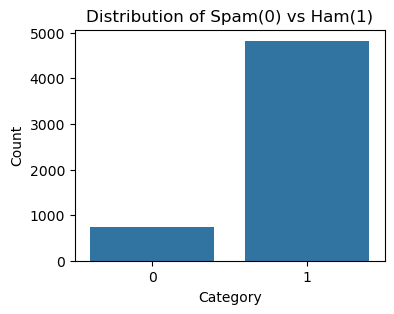

In [8]:
# Visualize spam vs ham distribution
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=mail_data)
plt.title("Distribution of Spam(0) vs Ham(1)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**Spam -->0**

**Ham -->1**

In [10]:
#Separating The Data As Texts & Label
X=mail_data['Message']
Y=mail_data['Category']
print(X.head())
print(Y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object


***Spliting The Data Into Training & Test Data***

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


***Feature Extraction***

In [14]:
fea_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=fea_extraction.fit_transform(X_train)
X_test_features=fea_extraction.transform(X_test)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')
print(X_train.head())

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
Name: Message, dtype: object


In [41]:
print(X_train_features[:2])

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033


***Model Training --> Logistic Regression***

In [17]:
model=LogisticRegression()

In [18]:
#Training The Logistic Regression Model With Training Data 
model.fit(X_train_features,Y_train);
print("Logistic Regression model has been trained.")

Logistic Regression model has been trained.


***Model Evaluation***

In [20]:
#Accuracy Of Training Data
training_data_prediction=model.predict(X_train_features)
training_data_accuracy=accuracy_score(Y_train,training_data_prediction)
print("Accuracy on Training Data: ",training_data_accuracy)

Accuracy on Training Data:  0.9676912721561588


In [21]:
#Accuracy Of Test Data
test_data_prediction=model.predict(X_test_features)
test_data_accuracy=accuracy_score(Y_test,test_data_prediction)
print("Accuracy on Test Data: ",test_data_accuracy)

Accuracy on Test Data:  0.9668161434977578


***Confusion Matrix Heatmap***

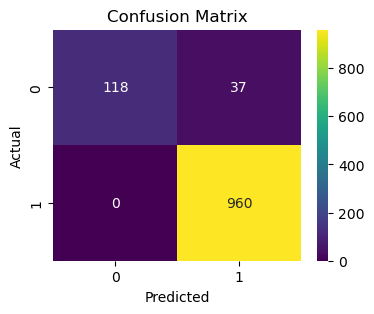

In [23]:
cm = confusion_matrix(Y_test, test_data_prediction)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

***Predictive System***

In [25]:
input_mail=["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
# Convert Text To Feature Vectors
input_data_features=fea_extraction.transform(input_mail)
# Making Prediction
prediction=model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print("It Is A Ham Mail")
else:
        print("It Is A Spam Mail")

[0]
It Is A Spam Mail
